# Leandro Ribeiro de Assiz

### Enunciado do Exercicio

Caro aluno(a) Leandro,

Nessa disciplina, aprendemos nossos conhecimentos em algoritmos supervisionados, família de algoritmos que é extremamente importante para o dia-a-dia de um cientista de dados. Agora iremos validar nosso conhecimento. 

1. Faça o módulo do Kaggle Intro to Machine Learning:
Comprove a finalização do módulo com um print que contenha data e identificação do aluno. 

### Será entregue o certificado de conclusão do curso junto com o pdf do notebook.

Trabalho com base:

Iremos usar a base de dados de vinhos verdes portugueses (nas variantes branco e tinto) que encontra-se disponível no Kaggle:

### Base de dados foi baixada e tratada para uso no trabalho. 

Para as questões 2-5 usaremos apenas os vinhos do tipo "branco".

2. Faça o download da base - esta é uma base real, apresentada no artigo:
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

### Artigo foi lido.

Ela possui uma variável denominada "quality", uma nota de 0 a 10 que denota a qualidade do vinho. Crie uma nova variável, chamada "opinion" que será uma variável categórica igual à 0, quando quality for menor e igual à 5. O valor será 1, caso contrário. Desconsidere a variável quality para o restante da análise.

### Feito no Notebook

3. Descreva as variáveis presentes na base. Quais são as variáveis? Quais são os tipos de variáveis (discreta, categórica, contínua)? Quais são as médias e desvios padrões?

### 1)As variáveis presente são as seguintes:'fixed acidity', 'volatile acidity', 'citric acid','residual sugar', 'chlorides', 'free sulfur dioxide','total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol','quality'.

#### 2) A base de dados apresenta variáveis categorica (type), discreta (quality) e continua (O restante das variáveis).

 ### 3) Esse item(ver no notebook) foi respondido com base na base de dados, notebbok com a função describe()

Com a base escolhida:

A) Descreva as etapas necessárias para criar um modelo de classificação eficiente.

### Criar um modelo de classificação eficiente envolve várias etapas. Aqui estão as etapas principais envolvidas no processo:

### 1. Entender claramente o problema que se deseja resolver, para que se possa escolher o melhor modelo inicial.

### 2. Coleta e carregamento de dados, para que seja feita a EDA , análise exploratória de ddos, sendo que é possível verificar os dados presentes, fazer alterações se necessário, limpar dados desnecessário, preenccher valores nulos,altera coluna, acrescentar coluna etc. Visualização dos dados para poder ter ideias, para os proximos passos.

### 4. Escolher  modelo de classificação para usar propriamente no problema tendo o entendimento do problema e dos modelos.

### 5. Dividir os dados em treino e teste, onde o treino serve para treinar o modelo e teste serve para testar o modelo com dados que não foram usados no treino para saber se o modelo está bom. 

### 6. Avaliar o desepenho do modelo usando metricas como curva ROC, F1, precision e recall.
   
### 7. Fazer ajustes , otimizar o modelo usando  validação cruzada, como K-folds.



B) Treine um modelo de regressão logística usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:
i. a média e desvio da acurácia dos modelos obtidos;
ii. a média e desvio da precisão dos modelos obtidos;
iii. a média e desvio da recall dos modelos obtidos;
iv. a média e desvio do f1-score dos modelos obtidos.


### Resposta no notebook.

C) Treine um modelo de árvores de decisão usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:
i. a média e desvio da acurácia dos modelos obtidos;
ii. a média e desvio da precisão dos modelos obtidos;
iii. a média e desvio da recall dos modelos obtidos;
iv. a média e desvio do f1-score dos modelos obtidos.

### Resposta no notebook.

D) Treine um modelo de SVM usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:
i. a média e desvio da acurácia dos modelos obtidos;
ii. a média e desvio da precisão dos modelos obtidos;
iii. a média e desvio da recall dos modelos obtidos;
iv. a média e desvio do f1-score dos modelos obtidos.

### Resposta no notebook.

5. Em relação à questão anterior, qual o modelo deveria ser escolhido para uma eventual operação. Responda essa questão mostrando a comparação de todos os modelos, usando um gráfico mostrando a curva ROC média para cada um dos gráficos e justifique.

### Resposta no notebook.

6. Com a escolha do melhor modelo, use os dados de vinho tinto, presentes na base original e faça a inferência (não é para treinar novamente!!!) para saber quantos vinhos são bons ou ruins. Utilize o mesmo critério utilizado com os vinhos brancos, para comparar o desempenho do modelo. Ele funciona da mesma forma para essa nova base? Justifique.

### Resposta no notebook.

7. Disponibilize os códigos usados para responder da questão 2-6 em uma conta github e indique o link para o repositório.
Assim que terminar, salve o seu arquivo PDF e poste no Moodle. Utilize o seu nome para nomear o arquivo, identificando também a disciplina no seguinte formato: “nomedoaluno_nomedadisciplina_pd.PDF”.

# Carregamento de bibliotecas 

In [94]:
#Carregando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score,
                             precision_score,
                             recall_score,
                             f1_score,
                             classification_report,
                             confusion_matrix,
                             mean_absolute_error,
                             roc_curve,
                             roc_auc_score,
                             auc,
                             RocCurveDisplay
)


In [95]:
#Carregamento da base de dados dos Vinhos
dados_vinho_total=pd.read_csv("winequalityN.csv")

In [96]:
#Dada Frame da base de dados
dados_vinho_total


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<Axes: >

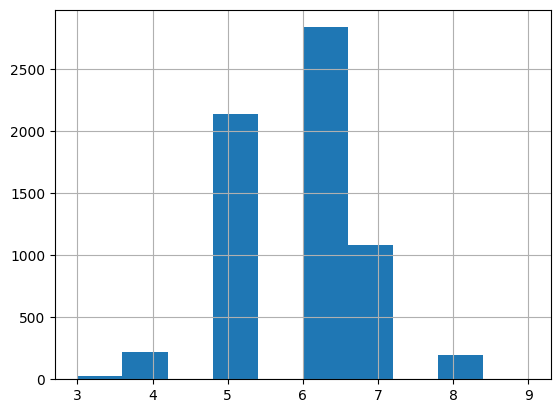

In [97]:
#Plotagem de Histógrama para verificar a  frequência que cada nota tem.
dados_vinho_total.quality.hist()

In [98]:
#Coletando informaçõe do data frame total
dados_vinho_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [99]:
#dados estatisticas como, média, desvio padrão etc 
dados_vinho_total.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [100]:
# Mostra o nome das colunas
dados_vinho_total.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [101]:
#Criando a variável "dados_vb" para filtra só vinhos brancos para usar nos modelos
dados_vb=dados_vinho_total[dados_vinho_total['type']=="white"]

<Axes: >

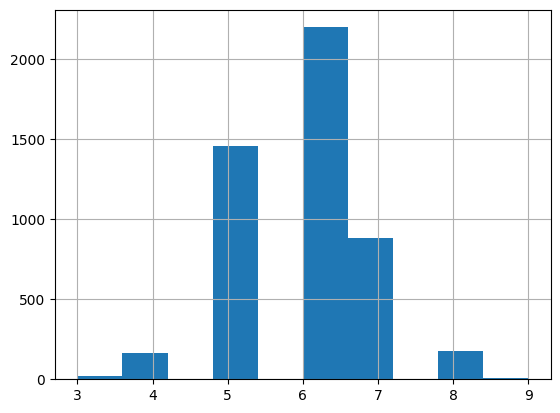

In [102]:
#verificando a frequência das notas após a filtragem só de vinhos Brancos na Tabela.
dados_vb.quality.hist()

In [103]:
#Mostra a tabela dos vinhos brancos depois da filtragem
dados_vb

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,white,6.5,NaN,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


### Reponde  uma parte da questão 3 com os valores mean (média) e STD(Desvio padrão) das variáveis do do vinho branco. 

In [104]:
#Mostra os dados estatisticos com a tabela dos vinhos brancos depois da filtragem

dados_vb.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4890.000000,4891.000000,4896.000000,4896.000000,4896.000000,4898.000000,4898.000000,4898.000000,4891.000000,4896.000000,4898.000000,4898.000000
mean,6.855532,0.278252,0.334250,6.393250,0.045778,35.308085,138.360657,0.994027,3.188203,0.489835,10.514267,5.877909
std,0.843808,0.100811,0.120985,5.072275,0.021850,17.007137,42.498065,0.002991,0.151014,0.114147,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [105]:
#Mostra a quantidade de dados nulos em cada  coluna
dados_vb.isnull().sum()

type                    0
fixed acidity           8
volatile acidity        7
citric acid             2
residual sugar          2
chlorides               2
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      7
sulphates               2
alcohol                 0
quality                 0
dtype: int64

In [106]:
# Interpolação dos dados para fazer a substituição dos dados nulos na tabela por dados estimados usandoa a função interpolate. 
dados_vb_t=dados_vb.interpolate()

In [107]:
#Verificando a quantidade de dados nulos, para saber se a função interpolate funcionou corretamente.
dados_vb_t.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [108]:
#Mostra a tabela após tratamento de dados nulos
dados_vb_t

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,white,6.2,0.210,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,white,6.6,0.320,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,white,6.5,0.305,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,white,5.5,0.290,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [109]:
# Retira a coluna "type" que é uma variavel categórica, e não tem mais utilidade nesse momento da exploração de dados.
del dados_vb_t['type']


In [110]:
# Mostra a tabela após a retirada da coluna "type"
dados_vb_t

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.210,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.320,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.305,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.290,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


<Axes: >

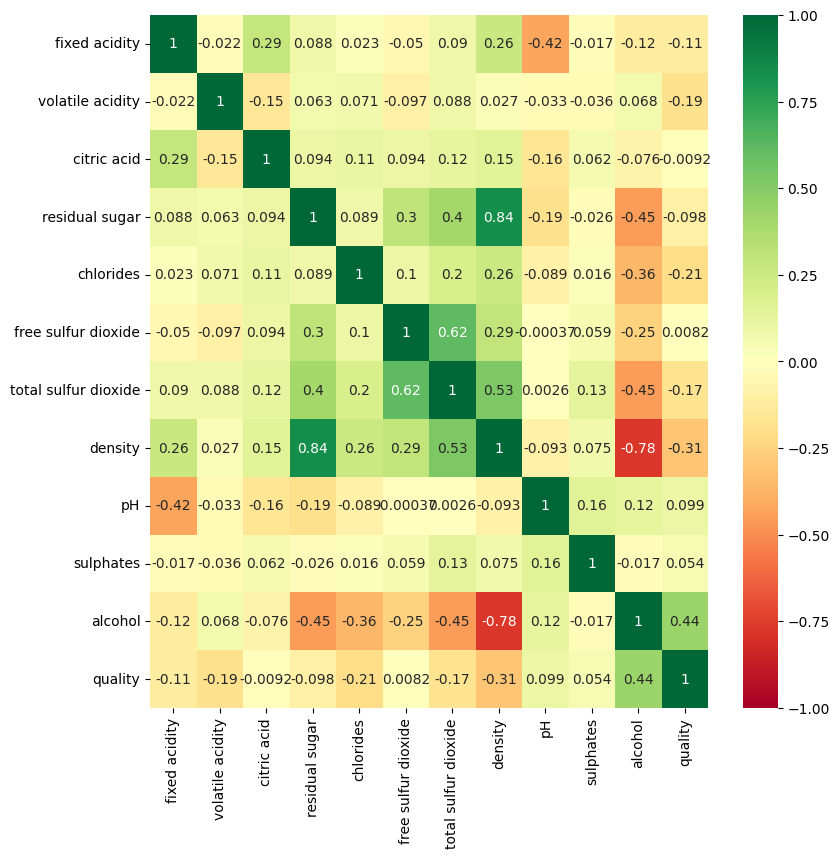

In [111]:

#Criando  mapa da calor de uma matriz de correlação
fig, ax = plt.subplots(1, 1, figsize=(9, 9))
sns.heatmap(dados_vb_t.corr(), vmax=1, vmin=-1, annot=True, ax=ax, cmap="RdYlGn")


In [112]:
#Mostra os nomes das colunas
dados_vb_t.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [113]:
#Criando uma nova coluna "opinion"
dados_vb_t["opinion"]=(dados_vb_t.quality > 5).astype(float)


var=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

X=dados_vb_t[var]
y=dados_vb_t["opinion"]

<Axes: >

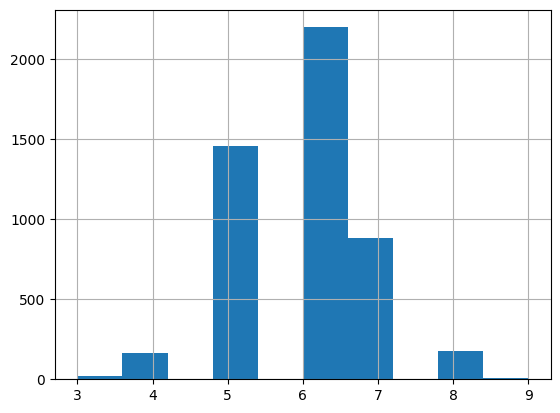

In [158]:
#histograma da variavel "quality" para ver a frequencia das nostas
dados_vb_t.quality.hist()

<Axes: >

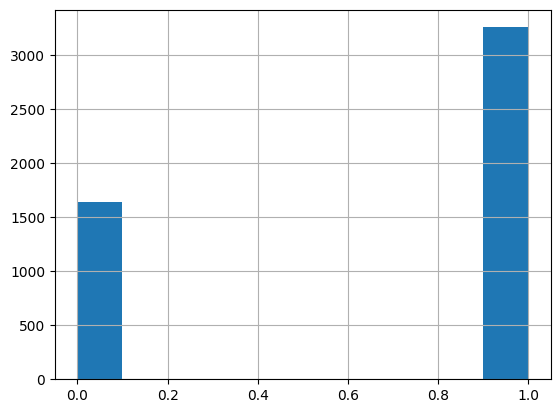

In [159]:
#histograma da variavel "opinion" para ver a frequencia  das classificação binária, sendo que é possível observar que a classificação comom vinho bom é bem maior do que a ruim. 
dados_vb_t.opinion.hist()

In [114]:
#Visualizando a bas e de dados 
dados_vb_t

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,opinion
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1.0
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1.0
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1.0
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1.0
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.210,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1.0
4894,6.6,0.320,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0.0
4895,6.5,0.305,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1.0
4896,5.5,0.290,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1.0


<Axes: >

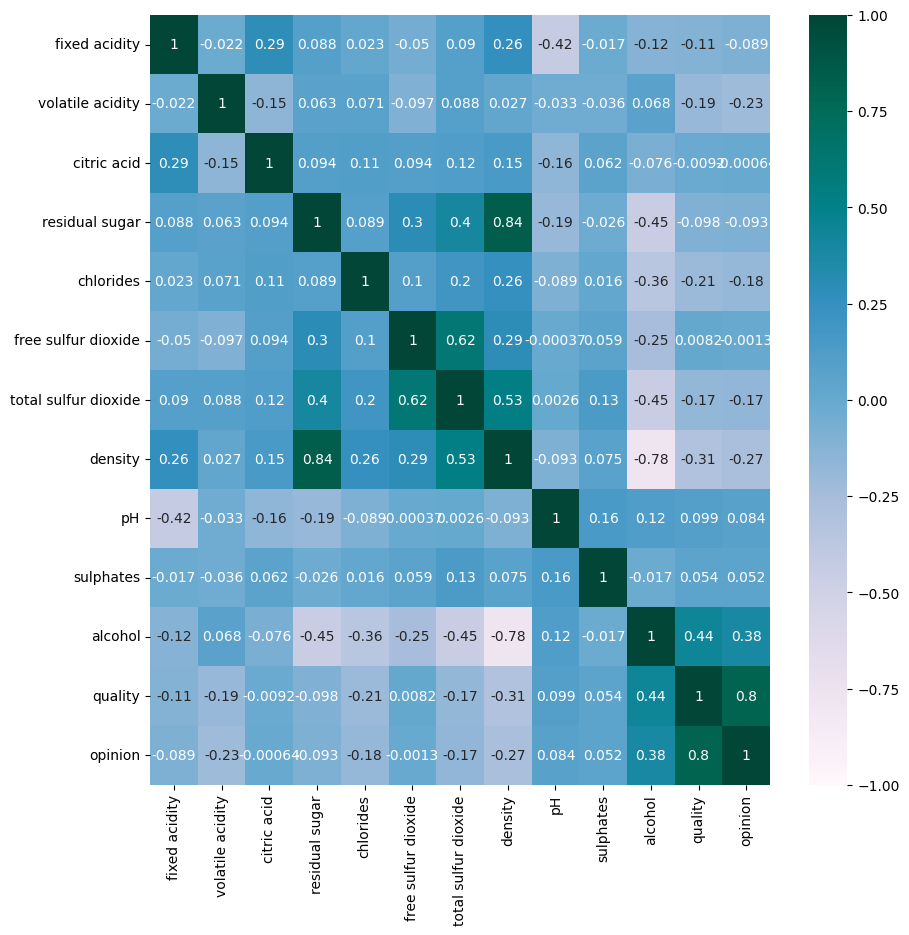

In [115]:
#Mapa de calor para a matriz de correlação
fig, ax=plt.subplots(1,1,figsize=(10,10))
sns.heatmap(dados_vb_t.corr(), vmax=1, vmin=-1, annot=True, ax=ax, cmap='PuBuGn')

### 4° Questão 
B) Treine um modelo de regressão logística usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:

i. a média e desvio da acurácia dos modelos obtidos;

ii. a média e desvio da precisão dos modelos obtidos;

iii. a média e desvio da recall dos modelos obtidos;

iv. a média e desvio do f1-score dos modelos obtidos.

### Treino Usando Regressão Logistica

In [116]:

# Padronizando os recursos
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Inicializando as listas para armazenar as métricas
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Definindo a validação cruzada estratificada com k-folds
k_folds = 10
stratified_kfold = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)



In [117]:
# Iterando sobre os folds
for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Treinando o modelo de regressão logística
    model = LogisticRegression(random_state=42)
    model.fit(X_train, y_train)

    # Realizando as predições
    y_pred = model.predict(X_test)

    # Calculando as métricas de desempenho
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Armazenando as métricas para cada fold
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Calculando as médias e desvios padrão das métricas
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
mean_precision = np.mean(precision_scores)
std_precision = np.std(precision_scores)
mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)



In [118]:
# Imprimindo os resultados
print("Média e desvio padrão da acurácia:")
print("Média: {:.4f}, Desvio padrão: {:.4f}".format(mean_accuracy, std_accuracy))
print()
print("Média e desvio padrão da precisão:")
print("Média: {:.4f}, Desvio padrão: {:.4f}".format(mean_precision, std_precision))
print()
print("Média e desvio padrão da recall:")
print("Média: {:.4f}, Desvio padrão: {:.4f}".format(mean_recall, std_recall))
print()
print("Média e desvio padrão do F1-score:")
print("Média: {:.4f}, Desvio padrão: {:.4f}".format(mean_f1, std_f1))


Média e desvio padrão da acurácia:
Média: 0.7497, Desvio padrão: 0.0160

Média e desvio padrão da precisão:
Média: 0.7753, Desvio padrão: 0.0159

Média e desvio padrão da recall:
Média: 0.8791, Desvio padrão: 0.0185

Média e desvio padrão do F1-score:
Média: 0.8237, Desvio padrão: 0.0107


C)Treine um modelo de árvores de decisão usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:

i. a média e desvio da acurácia dos modelos obtidos;

ii. a média e desvio da precisão dos modelos obtidos;

iii. a média e desvio da recall dos modelos obtidos;

iv. a média e desvio do f1-score dos modelos obtidos.

### Treino Usando árvores de decisão

In [119]:
# variáveis
X1=dados_vb_t[var]
y1=dados_vb_t["opinion"]

# Padronizando os recursos
scaler = StandardScaler()
X1 = scaler.fit_transform(X1)

# Inicializando as listas para armazenar as métricas
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Definindo a validação cruzada estratificada com k-folds
k_folds = 10
stratified_kfold = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

In [120]:
# Iterando sobre os folds
for train_index, test_index in stratified_kfold.split(X1, y1):
    X1_train, X1_test = X1[train_index], X1[test_index]
    y1_train, y1_test = y1[train_index], y1[test_index]

    # Treinando o modelo de arvore de decisão
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X1_train, y1_train)

    # Realizando as predições
    y1_pred = clf.predict(X1_test)

    # Calculando as métricas de desempenho
    accuracy = accuracy_score(y1_test, y1_pred)
    precision = precision_score(y1_test, y1_pred)
    recall = recall_score(y1_test, y1_pred)
    f1 = f1_score(y1_test, y1_pred)

    # Armazenando as métricas para cada fold
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Calculando as médias e desvios padrão das métricas
mean_accuracy1 = np.mean(accuracy_scores)
std_accuracy1 = np.std(accuracy_scores)
mean_precision1 = np.mean(precision_scores)
std_precision1 = np.std(precision_scores)
mean_recall1 = np.mean(recall_scores)
std_recall1 = np.std(recall_scores)
mean_f11 = np.mean(f1_scores)
std_f11 = np.std(f1_scores)


In [121]:
# Imprimindo os resultados
print("Média e desvio padrão da acurácia:")
print("Média: {:.4f}, Desvio padrão: {:.4f}".format(mean_accuracy1, std_accuracy1))
print()
print("Média e desvio padrão da precisão:")
print("Média: {:.4f}, Desvio padrão: {:.4f}".format(mean_precision1, std_precision1))
print()
print("Média e desvio padrão da recall:")
print("Média: {:.4f}, Desvio padrão: {:.4f}".format(mean_recall1, std_recall1))
print()
print("Média e desvio padrão do F1-score:")
print("Média: {:.4f}, Desvio padrão: {:.4f}".format(mean_f11, std_f11))

Média e desvio padrão da acurácia:
Média: 0.7926, Desvio padrão: 0.0195

Média e desvio padrão da precisão:
Média: 0.8470, Desvio padrão: 0.0128

Média e desvio padrão da recall:
Média: 0.8401, Desvio padrão: 0.0282

Média e desvio padrão do F1-score:
Média: 0.8433, Desvio padrão: 0.0166


D)Treine um modelo SVM usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:

i. a média e desvio da acurácia dos modelos obtidos;

ii. a média e desvio da precisão dos modelos obtidos;

iii. a média e desvio da recall dos modelos obtidos;

iv. a média e desvio do f1-score dos modelos obtidos.

### Treino Usando SVM(Suport Vector Machine)

In [122]:
X2=dados_vb_t[var]
y2=dados_vb_t["opinion"]

# Padronizando os recursos
scaler = StandardScaler()
X2 = scaler.fit_transform(X2)

# Inicializando as listas para armazenar as métricas
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Definindo a validação cruzada estratificada com k-folds
k_folds = 10
stratified_kfold = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

In [123]:
# Iterando sobre os folds
for train_index, test_index in stratified_kfold.split(X2, y2):
    X2_train, X2_test = X2[train_index], X2[test_index]
    y2_train, y2_test = y2[train_index], y2[test_index]

    # Treinando o modelo de arvore de decisão
    svm = SVC(random_state=42)
    svm.fit(X2_train, y2_train)

    # Realizando as predições
    y2_pred = svm.predict(X2_test)

    # Calculando as métricas de desempenho
    accuracy = accuracy_score(y2_test, y2_pred)
    precision = precision_score(y2_test, y2_pred)
    recall = recall_score(y2_test, y2_pred)
    f1 = f1_score(y2_test, y2_pred)

    # Armazenando as métricas para cada fold
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Calculando as médias e desvios padrão das métricas
mean_accuracy2 = np.mean(accuracy_scores)
std_accuracy2 = np.std(accuracy_scores)
mean_precision2 = np.mean(precision_scores)
std_precision2 = np.std(precision_scores)
mean_recall2 = np.mean(recall_scores)
std_recall2 = np.std(recall_scores)
mean_f12 = np.mean(f1_scores)
std_f12 = np.std(f1_scores)


In [124]:
# Imprimindo os resultados
print("Média e desvio padrão da acurácia:")
print("Média: {:.4f}, Desvio padrão: {:.4f}".format(mean_accuracy2, std_accuracy2))
print()
print("Média e desvio padrão da precisão:")
print("Média: {:.4f}, Desvio padrão: {:.4f}".format(mean_precision2, std_precision2))
print()
print("Média e desvio padrão da recall:")
print("Média: {:.4f}, Desvio padrão: {:.4f}".format(mean_recall2, std_recall2))
print()
print("Média e desvio padrão do F1-score:")
print("Média: {:.4f}, Desvio padrão: {:.4f}".format(mean_f12, std_f12))

Média e desvio padrão da acurácia:
Média: 0.7834, Desvio padrão: 0.0134

Média e desvio padrão da precisão:
Média: 0.8108, Desvio padrão: 0.0110

Média e desvio padrão da recall:
Média: 0.8797, Desvio padrão: 0.0133

Média e desvio padrão do F1-score:
Média: 0.8438, Desvio padrão: 0.0097


### 5.Em relação à questão anterior, qual o modelo deveria ser escolhido para uma eventual operação. Responda essa questão mostrando a comparação de todos os modelos, usando um gráfico mostrando a curva ROC média para cada um dos gráficos e justifique.

### Resposta: Após fazer as curvas ROC , média e simples como forma de comparar os dois jeitos, e analisar os dados das curvas médias para cada modelo (Regressão Logistica , Árvore de Decisão e SVM) fica claro que o modelo SVM tem o melhor desepenho  com AUC (área sobre a curva) 0.83 contra 0.80 da Regressão Logistica e 0.77 da Árvore de Decisão.  


#### Curva ROC média do Modelo de Regressão Logistica

In [125]:


# Definir o número de folds
k_folds = 10

# Definir arrays vazios para armazenar as taxas de falso positivo (FPR) e verdadeiro positivo (TPR) de cada fold
mean_fpr = np.linspace(0, 1, 100)
tprs = []

# Inicializar a variável para armazenar as áreas sob a curva (AUC) de cada fold
aucs = []

# Definir o objeto do k-folds estratificado
cv = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)




In [126]:


# Realizar validação cruzada
for train_index, test_index in cv.split(X, y):
    # Dividir o conjunto de dados em treino e teste para cada fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Treinar o modelo de regressão logística
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Calcular as probabilidades preditas do conjunto de teste
    y_scores = model.predict_proba(X_test)[:, 1]

    # Calcular a curva ROC para o fold atual
    fpr, tpr, _ = roc_curve(y_test, y_scores)

    # Interpolar e salvar a TPR do fold atual
    tprs.append(np.interp(mean_fpr, fpr, tpr))

    # Calcular a AUC do fold atual
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)

# Calcular a média e desvio padrão da AUC
mean_auc = np.mean(aucs)
std_auc = np.std(aucs)



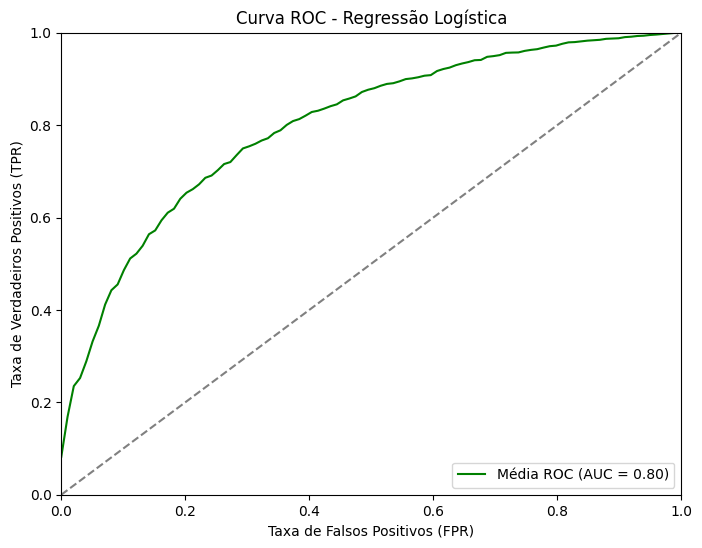

In [127]:


# Plotar a curva ROC média
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)

plt.figure(figsize=(8, 6))
plt.plot(mean_fpr, mean_tpr, color='g', label='Média ROC (AUC = %0.2f)' % mean_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC - Regressão Logística')
plt.legend(loc="lower right")
plt.show()


#### Cuva ROC simples do Modelo de Regressão Logística

In [128]:


# Treinar o modelo de regressão logística
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

# Obter as probabilidades previstas para a classe positiva
y_prob = logistic_regression.predict_proba(X_test)[:, 1]

# Calcular a taxa de falsos positivos, taxa de verdadeiros positivos e thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcular a área sob a curva (AUC)
roc_auc = auc(fpr, tpr)




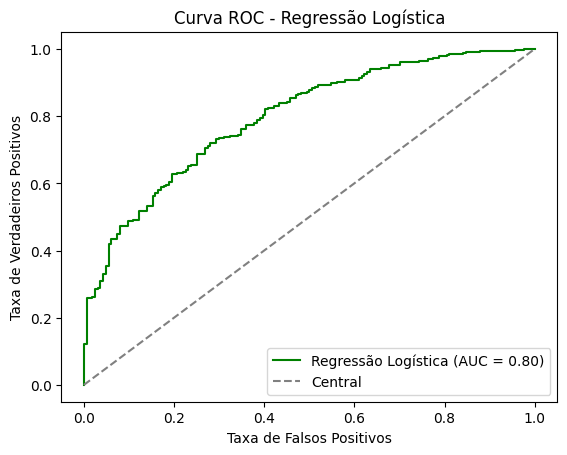

In [129]:


# Plotar a curva ROC
plt.plot(fpr, tpr,color="g", label=f'Regressão Logística (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Central')

# Configurar o gráfico
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Regressão Logística')
plt.legend(loc='lower right')

# Exibir o gráfico
plt.show()


#### Curva ROC média do Modelo de Árvore de Decisão

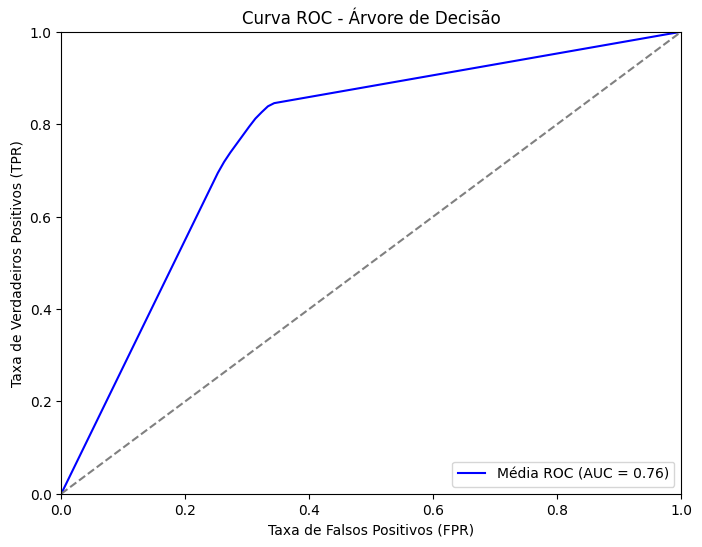

In [130]:


# Definir o número de folds
k_folds = 10

# Definir arrays vazios para armazenar as taxas de falso positivo (FPR) e verdadeiro positivo (TPR) de cada fold
mean_fpr = np.linspace(0, 1, 100)
tprs = []

# Inicializar a variável para armazenar as áreas sob a curva (AUC) de cada fold
aucs = []

# Definir o objeto do k-folds estratificado
cv = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Realizar validação cruzada
for train_index, test_index in cv.split(X, y):
    # Dividir o conjunto de dados em treino e teste para cada fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Treinar o modelo de regressão logística
    model1 = DecisionTreeClassifier()
    model1.fit(X_train, y_train)

    # Calcular as probabilidades preditas do conjunto de teste
    y_scores = model1.predict_proba(X_test)[:, 1]

    # Calcular a curva ROC para o fold atual
    fpr, tpr, _ = roc_curve(y_test, y_scores)

    # Interpolar e salvar a TPR do fold atual
    tprs.append(np.interp(mean_fpr, fpr, tpr))

    # Calcular a AUC do fold atual
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)

# Calcular a média e desvio padrão da AUC
mean_auc = np.mean(aucs)
std_auc = np.std(aucs)

# Plotar a curva ROC média
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)

plt.figure(figsize=(8, 6))
plt.plot(mean_fpr, mean_tpr, color='b', label='Média ROC (AUC = %0.2f)' % mean_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC - Árvore de Decisão')
plt.legend(loc="lower right")
plt.show()


#### Curva ROC simples do Modelo Arvore de Decisão

In [131]:


# Treinar o modelo de regressão logística
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Obter as probabilidades previstas para a classe positiva
y_prob = dt.predict_proba(X_test)[:, 1]

# Calcular a taxa de falsos positivos, taxa de verdadeiros positivos e thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcular a área sob a curva (AUC)
roc_auc = auc(fpr, tpr)




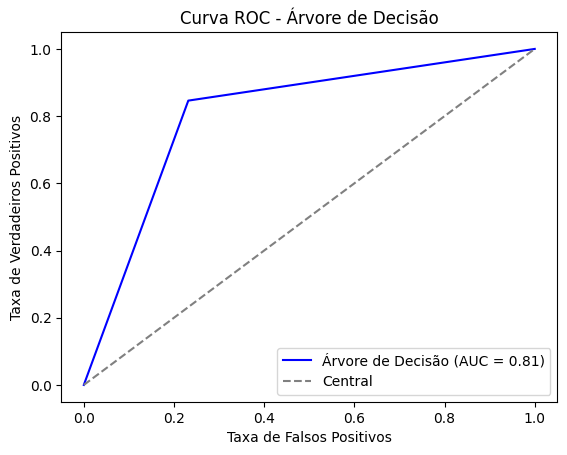

In [132]:


# Plotar a curva ROC
plt.plot(fpr, tpr,color="b", label=f'Árvore de Decisão (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Central')

# Configurar o gráfico
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Árvore de Decisão')
plt.legend(loc='lower right')

# Exibir o gráfico
plt.show()


#### Curva ROC do Modelo SVM (Suport Vector Machine)

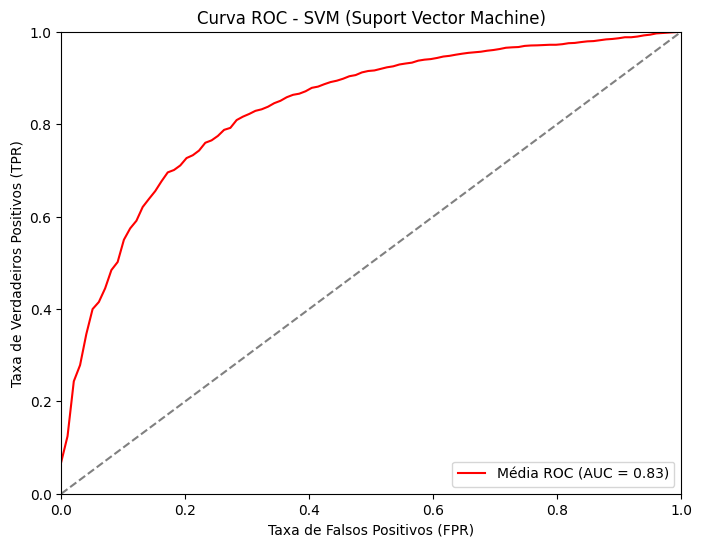

In [133]:


# Definir o número de folds
k_folds = 10

# Definir arrays vazios para armazenar as taxas de falso positivo (FPR) e verdadeiro positivo (TPR) de cada fold
mean_fpr = np.linspace(0, 1, 100)
tprs = []

# Inicializar a variável para armazenar as áreas sob a curva (AUC) de cada fold
aucs = []

# Definir o objeto do k-folds estratificado
cv = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Realizar validação cruzada
for train_index, test_index in cv.split(X, y):
    # Dividir o conjunto de dados em treino e teste para cada fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Treinar o modelo de regressão logística
    model2 = SVC(probability=True)
    model2.fit(X_train, y_train)

    # Calcular as probabilidades preditas do conjunto de teste
    y_scores = model2.predict_proba(X_test)[:, 1]

    # Calcular a curva ROC para o fold atual
    fpr, tpr, _ = roc_curve(y_test, y_scores)

    # Interpolar e salvar a TPR do fold atual
    tprs.append(np.interp(mean_fpr, fpr, tpr))

    # Calcular a AUC do fold atual
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)

# Calcular a média e desvio padrão da AUC
mean_auc = np.mean(aucs)
std_auc = np.std(aucs)

# Plotar a curva ROC média
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)

plt.figure(figsize=(8, 6))
plt.plot(mean_fpr, mean_tpr, color='r', label='Média ROC (AUC = %0.2f)' % mean_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC - SVM (Suport Vector Machine)')
plt.legend(loc="lower right")
plt.show()


#### Curva ROC simples do Modelo SVM (Suport Vector Machine)

In [134]:

# Treinar o modelo SVM
svm = SVC(probability=True)
svm.fit(X_train, y_train)

# Obter as probabilidades previstas para a classe positiva
y_prob = svm.predict_proba(X_test)[:, 1]

# Calcular a taxa de falsos positivos, taxa de verdadeiros positivos e thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcular a área sob a curva (AUC)
roc_auc = auc(fpr, tpr)




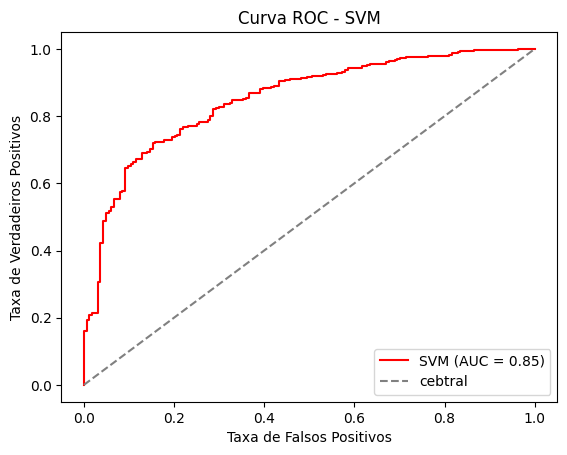

In [135]:

# Plotar a curva ROC
plt.plot(fpr, tpr,color="r", label=f'SVM (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='cebtral')

# Configurar o gráfico
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - SVM')
plt.legend(loc='lower right')

# Exibir o gráfico
plt.show()


#### 6.Com a escolha do melhor modelo, use os dados de vinho tinto, presentes na base original e faça a inferência (não é para treinar novamente!!!) para saber quantos vinhos são bons ou ruins. Utilize o mesmo critério utilizado com os vinhos brancos, para comparar o desempenho do modelo. Ele funciona da mesma forma para essa nova base? Justifique.


### Resposta : Não. Com a nova base após análise exploratória , por dedução ou inferencia, sem fazer treino do modelo, é possível concluir que o modelo não responde da mesma forma porque o vinho branco e o  tinto são diferentes , composição quimica diferente , processo de produção, região de origem, dentre outras variéveis, o que vai acarretar na mudança dos parametros de entrada no modelo causando resposta diferente.

In [136]:
#Iniciando nova análise exploratória para o vinho tinto, com a visualização inicial da base de dados original
dados_vinho_total

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [137]:
# Fazendo a filtragem da base de dados para somente vinhos tintos
dados_vv=dados_vinho_total[dados_vinho_total["type"]=="red"]

In [138]:
#Visualizando os dados após filtragem
dados_vv

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4898,red,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
4899,red,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
4900,red,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
4901,red,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4902,red,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [139]:
# Informações sobre a base de dados
dados_vv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1599 entries, 4898 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  1599 non-null   object 
 1   fixed acidity         1597 non-null   float64
 2   volatile acidity      1598 non-null   float64
 3   citric acid           1598 non-null   float64
 4   residual sugar        1599 non-null   float64
 5   chlorides             1599 non-null   float64
 6   free sulfur dioxide   1599 non-null   float64
 7   total sulfur dioxide  1599 non-null   float64
 8   density               1599 non-null   float64
 9   pH                    1597 non-null   float64
 10  sulphates             1597 non-null   float64
 11  alcohol               1599 non-null   float64
 12  quality               1599 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 174.9+ KB


In [140]:
#dados Estatisticas sobre a base de dados
dados_vv.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1597.000000,1598.000000,1598.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1597.000000,1597.000000,1599.000000,1599.000000
mean,8.322104,0.527738,0.271145,2.538806,0.087467,15.874922,46.467792,0.996747,3.310864,0.658078,10.422983,5.636023
std,1.740767,0.179085,0.194744,1.409928,0.047065,10.460157,32.895324,0.001887,0.154290,0.169594,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [141]:
# Verificando se tem dados nulos
dados_vv.isnull().sum()

type                    0
fixed acidity           2
volatile acidity        1
citric acid             1
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      2
sulphates               2
alcohol                 0
quality                 0
dtype: int64

In [142]:
# Preenchnendo os dados nulos
dados_vvt=dados_vv.interpolate()

In [143]:
# Verificando se tem dados nulos
dados_vvt.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: >

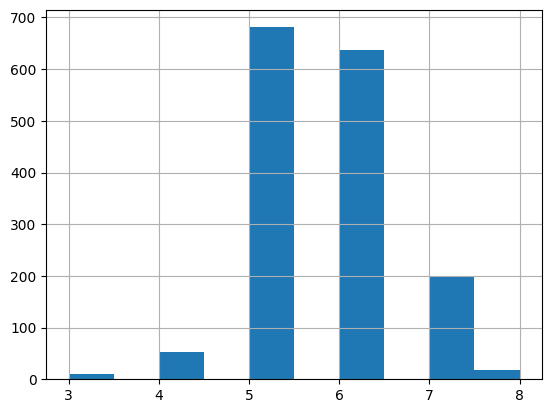

In [144]:
# histograma para ver a frequência  de notas  para o vinho tinto
dados_vvt.quality.hist()

In [145]:
#Retira a Coluna Tyoe
del dados_vvt["type"]

In [146]:
# visualizando os dados
dados_vvt

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4898,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.560,9.4,5
4899,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.680,9.8,5
4900,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.650,9.8,5
4901,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.580,9.8,6
4902,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.560,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580,10.5,5
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.665,11.2,6
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750,11.0,6
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710,10.2,5


In [153]:
#Criação de variável opinion seguindo o mesmo critério do vinho branco para o vermelho 
dados_vvt["opinion"]=(dados_vvt.quality > 5).astype(float)


In [154]:
# Visualizando os nomes das colunas
dados_vvt.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'opinion'],
      dtype='object')

<Axes: >

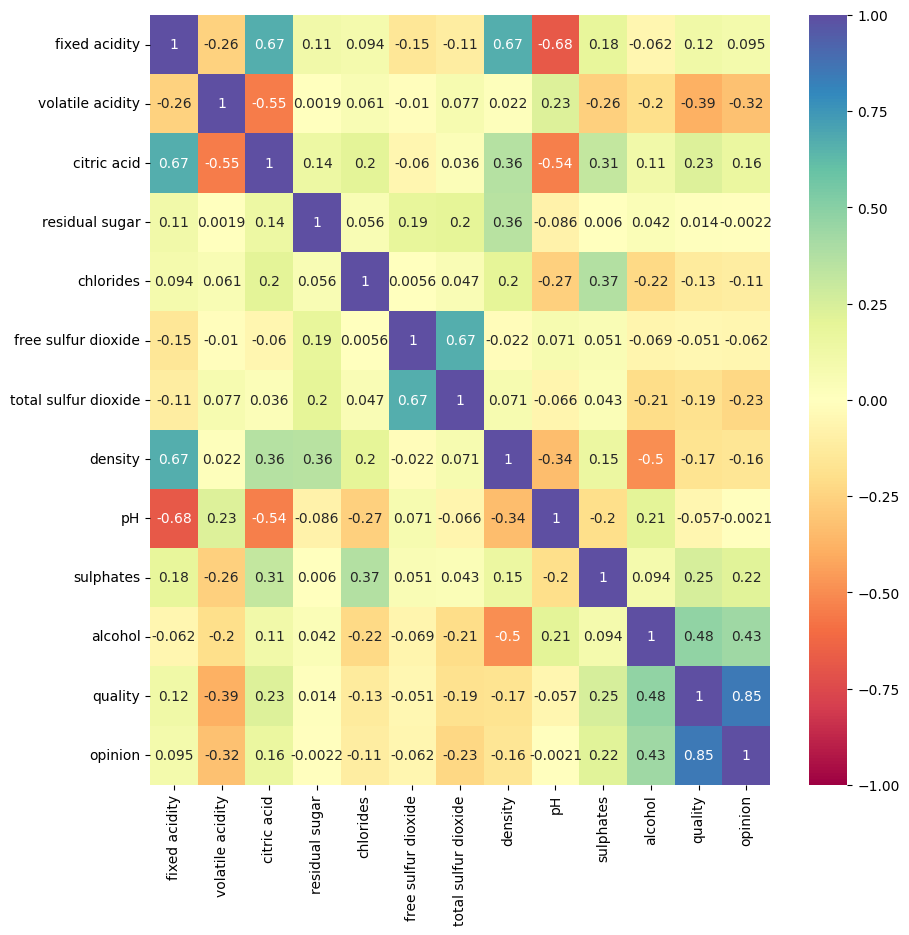

In [156]:
# Mapa de calor de matriz de correlação após tratamento de dados
fig, ax=plt.subplots(1,1,figsize=(10,10))
sns.heatmap(dados_vvt.corr(), vmax=1, vmin=-1, annot=True, ax=ax, cmap="Spectral")


<Axes: >

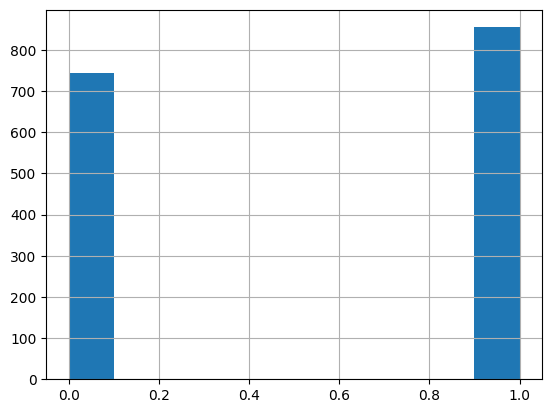

In [150]:
#histograma da coluna criada opinion, onde é possível observar que o número de nota classificando como bom é maior do que  como ruim.
dados_vvt.opinion.hist()

# Fim do Exercício